# **Importing Necessary Libraries**

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

---



In [2]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [3]:
df = pd.read_csv("train.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [6]:
df.shape

(15120, 56)

## **Removing One Hot Encoding**

---



In [5]:
soil_type = df.iloc[:,15:55]
soil_type.head()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
st_list = list()
for i in range(15120):

  val = np.argmax(soil_type.loc[i])
  val += 1
  st_list.append(val)

In [18]:
df["Soil_Type"] = st_list

In [19]:
df = df.drop(df.columns[15:55], axis=1)

In [20]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Soil_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,29
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,29
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,2,12
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,2,30
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,29


In [22]:
df.shape

(15120, 17)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [24]:
wild_area = df.iloc[:, 11:15]
wild_area.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [25]:
wa_list = list()
for i in range(15120):

  val = np.argmax(wild_area.loc[i])
  val += 1
  wa_list.append(val)

In [26]:
df["Wilderness_Area"] = wa_list

In [27]:
df = df.drop(df.columns[11:15], axis=1)

In [28]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,1,2596,51,3,258,0,510,221,232,148,6279,5,29,1
1,2,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
2,3,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
3,4,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
4,5,2595,45,2,153,-1,391,220,234,150,6172,5,29,1


In [29]:
df.shape

(15120, 14)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Cover_Type                          15120 non-null  int64
 12  Soil

In [53]:
df["Cover_Type"].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

# **Checking for NULL Values**

---



In [31]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
Soil_Type                             0
Wilderness_Area                       0
dtype: int64

# **Data Visualisation**

---



<Axes: xlabel='Horizontal_Distance_To_Hydrology', ylabel='Vertical_Distance_To_Hydrology'>

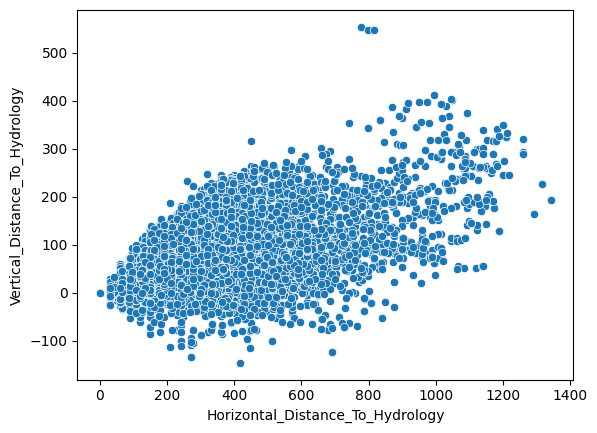

In [34]:
sns.scatterplot(x="Horizontal_Distance_To_Hydrology",
                y="Vertical_Distance_To_Hydrology",
                data = df)

<Axes: xlabel='Slope', ylabel='Elevation'>

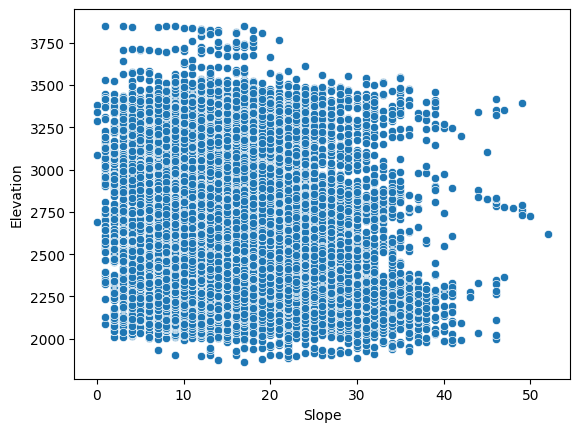

In [39]:
sns.scatterplot(x="Slope", y="Elevation", data=df)

<Axes: xlabel='Wilderness_Area', ylabel='Soil_Type'>

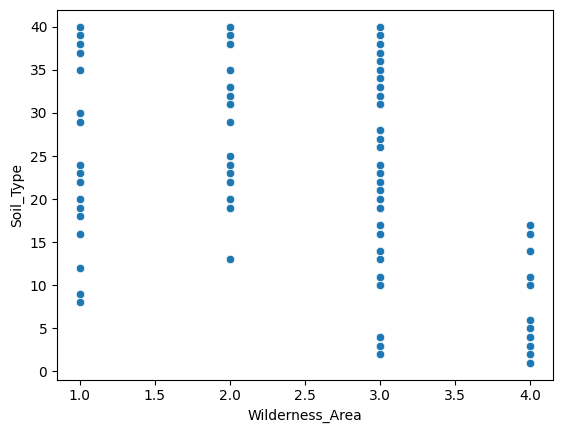

In [35]:
sns.scatterplot(x="Wilderness_Area", y="Soil_Type",
                data = df)

<Axes: xlabel='Wilderness_Area', ylabel='count'>

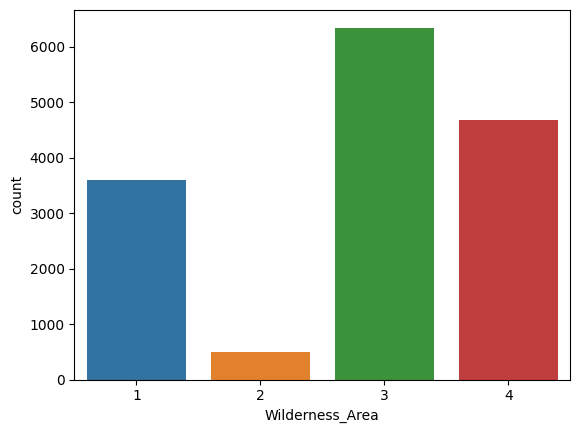

In [37]:
sns.countplot(x="Wilderness_Area", data=df)

<Axes: xlabel='Soil_Type', ylabel='count'>

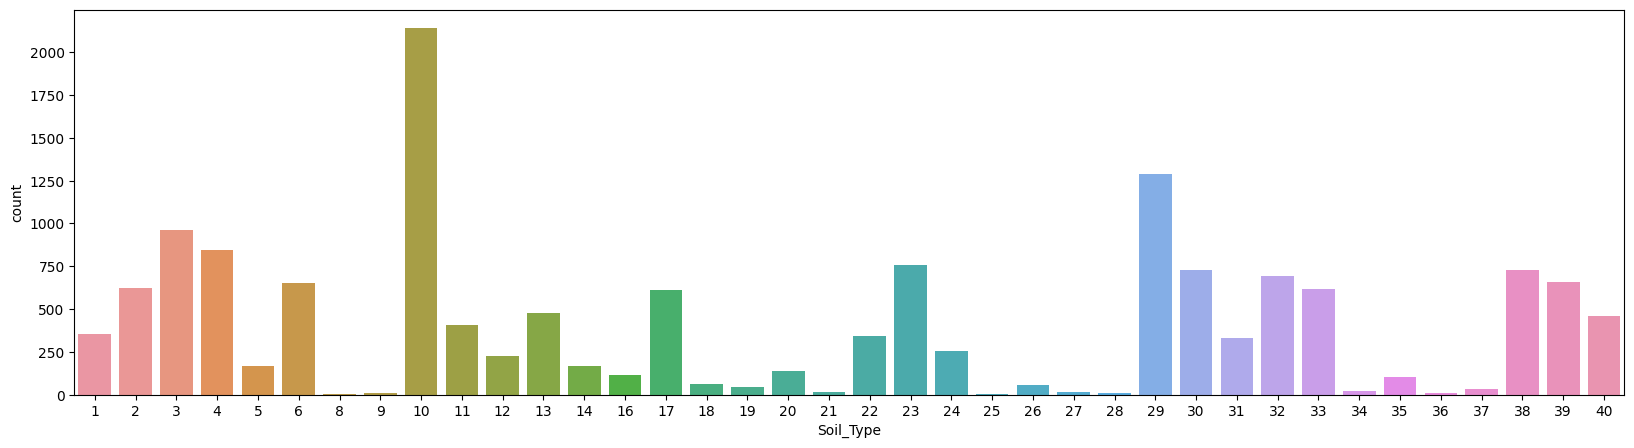

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(x="Soil_Type", data=df)

<Axes: xlabel='Cover_Type', ylabel='count'>

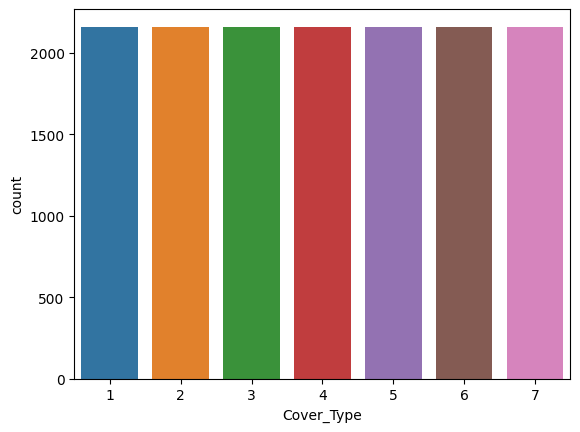

In [54]:
sns.countplot(x="Cover_Type", data=df)

<Axes: >

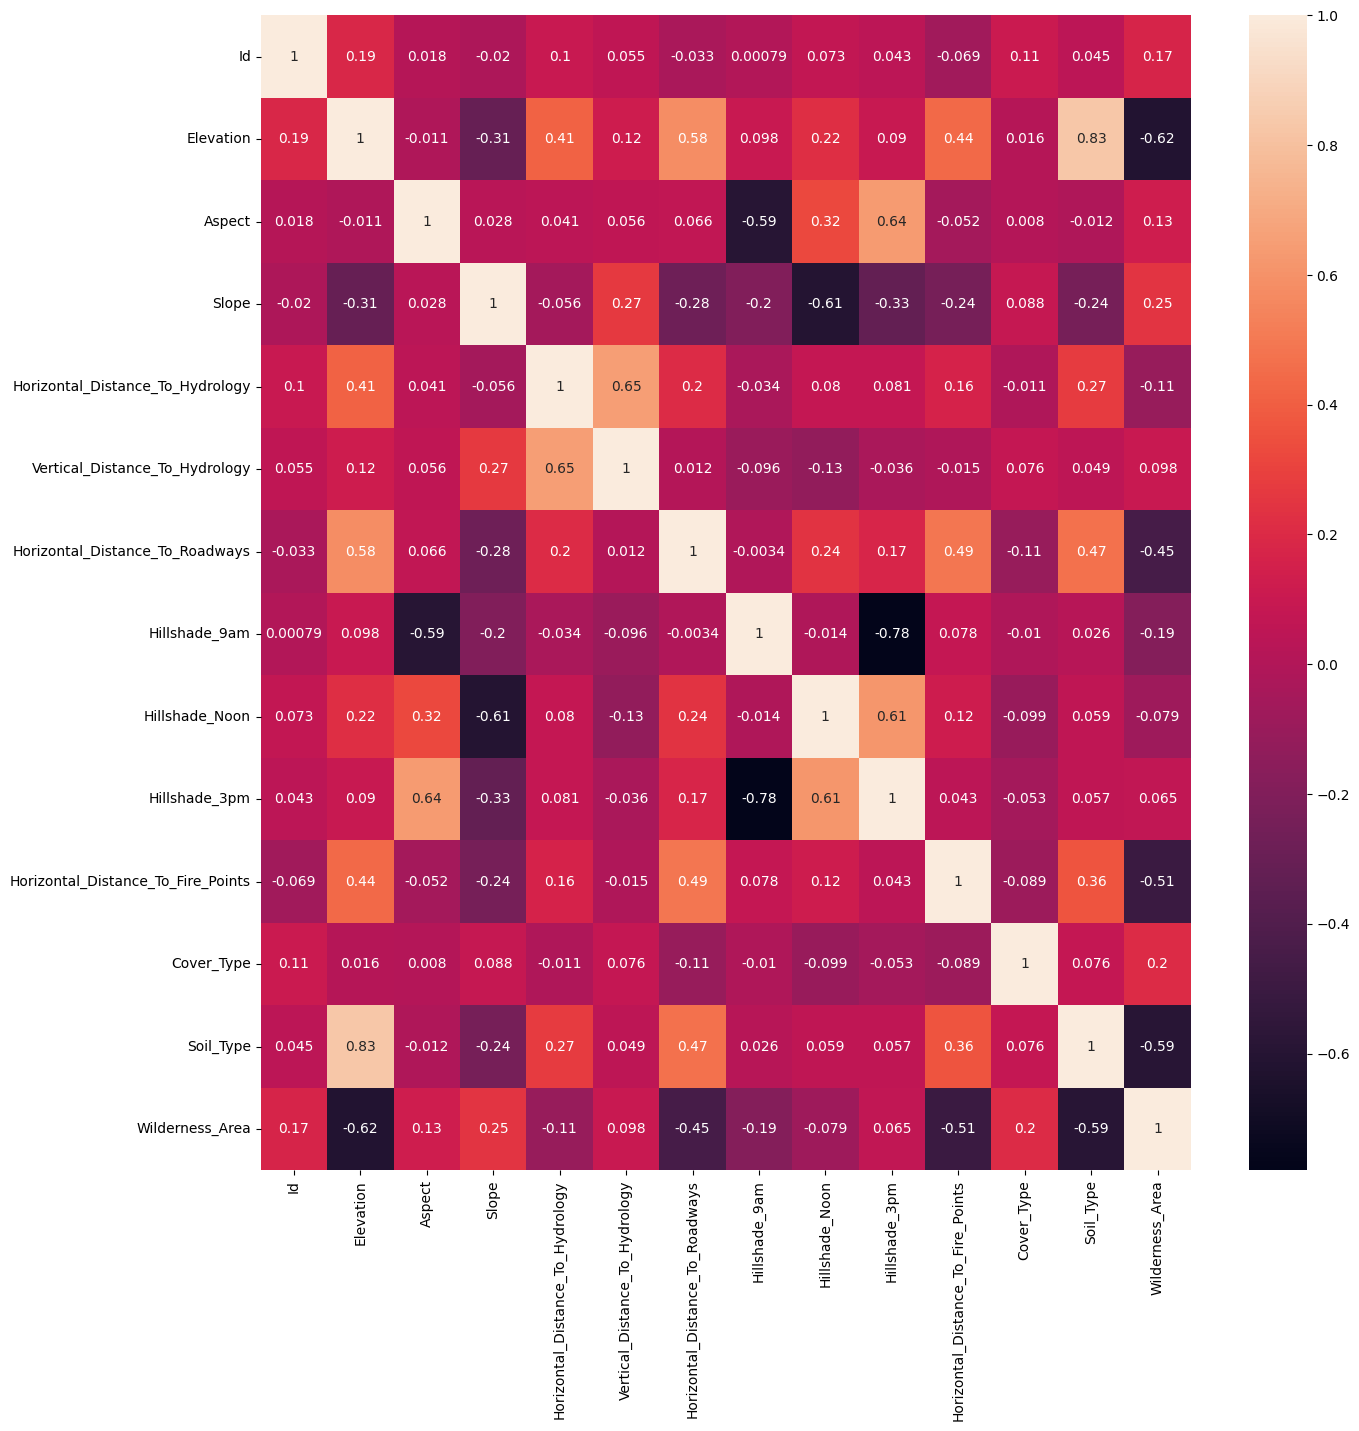

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

# **Splitting Dependent & Independent Variables**

---



In [41]:
X = df.drop(["Id", "Cover_Type"], axis=1)
y = df["Cover_Type"]

In [42]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,29,1


In [55]:
y = y-1

In [56]:
y.head()

0    4
1    4
2    1
3    1
4    4
Name: Cover_Type, dtype: int64

# **Splitting into Training & Testing Set**

---



In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12096, 12)
(3024, 12)
(12096,)
(3024,)


# **Model Building - XGBoost Classifier**

---



In [45]:
from xgboost import XGBClassifier
xgbc_model = XGBClassifier()

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
xgbc_params = {'gamma' :[i/10.0 for i in range(0,5)],
               'max_depth' : [2,4,6,8,10,12,13,15],
               'min_child_weight':[1,2,5,10],
               'max_delta_step':[0,1,2,5,10],
               'subsample' :[i/10.0 for i in range(5,10)],
               'colsample_bytree' :[i/10.0 for i in range(5,10)],
               'colsample_bylevel' :[i/10.0 for i in range(5,10)],
               'n_estimators' : [100,150,200,300]
               }

In [48]:
xgbc_cv = RandomizedSearchCV(estimator=xgbc_model,
                            param_distributions=xgbc_params,
                            cv=10)

In [60]:
xgbc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 13,
                                                      15],
                                        'min_child_weight': [1, 2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

In [61]:
xgbc_cv.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'min_child_weight': 2,
 'max_depth': 8,
 'max_delta_step': 2,
 'gamma': 0.0,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.7}

In [62]:
xgbc_model = XGBClassifier( subsample = 0.7,
                           n_estimators = 200,
                            min_child_weight = 2,
                            max_depth = 8,
                            max_delta_step = 2,
                            gamma = 0.0,
                            colsample_bytree = 0.7,
                            colsample_bylevel = 0.7
                            )

In [63]:
xgbc_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=8, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [64]:
xgbc_model.score(X_test, y_test)

0.8416005291005291

In [65]:
y_preds = xgbc_model.predict(X_test)

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       439
           1       0.73      0.65      0.69       411
           2       0.81      0.83      0.82       418
           3       0.93      0.97      0.95       438
           4       0.87      0.93      0.89       428
           5       0.86      0.84      0.85       471
           6       0.91      0.94      0.93       419

    accuracy                           0.84      3024
   macro avg       0.84      0.84      0.84      3024
weighted avg       0.84      0.84      0.84      3024



# **Testing Data**

---



In [68]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [69]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [74]:
test_df.shape

(565892, 55)

In [73]:
t_soil_type = test_df.iloc[:,15:55]
t_soil_type.head()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
t_st_list = list()
for i in range(565892):

  val = np.argmax(t_soil_type.loc[i])
  val += 1
  t_st_list.append(val)

In [76]:
test_df["Soil_Type"] = t_st_list

In [77]:
test_df = test_df.drop(test_df.columns[15:55], axis=1)

In [78]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  565892 non-null  int64
 1   Elevation                           565892 non-null  int64
 2   Aspect                              565892 non-null  int64
 3   Slope                               565892 non-null  int64
 4   Horizontal_Distance_To_Hydrology    565892 non-null  int64
 5   Vertical_Distance_To_Hydrology      565892 non-null  int64
 6   Horizontal_Distance_To_Roadways     565892 non-null  int64
 7   Hillshade_9am                       565892 non-null  int64
 8   Hillshade_Noon                      565892 non-null  int64
 9   Hillshade_3pm                       565892 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  565892 non-null  int64
 11  Wilderness_Area1                    565892 non-null 

In [79]:
t_wild_area = test_df.iloc[:, 11:15]
t_wild_area.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [80]:
t_wa_list = list()
for i in range(565892):

  val = np.argmax(t_wild_area.loc[i])
  val += 1
  t_wa_list.append(val)

In [81]:
test_df["Wilderness_Area"] = t_wa_list

In [83]:
test_df = test_df.drop(test_df.columns[11:15], axis=1)

In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  565892 non-null  int64
 1   Elevation                           565892 non-null  int64
 2   Aspect                              565892 non-null  int64
 3   Slope                               565892 non-null  int64
 4   Horizontal_Distance_To_Hydrology    565892 non-null  int64
 5   Vertical_Distance_To_Hydrology      565892 non-null  int64
 6   Horizontal_Distance_To_Roadways     565892 non-null  int64
 7   Hillshade_9am                       565892 non-null  int64
 8   Hillshade_Noon                      565892 non-null  int64
 9   Hillshade_3pm                       565892 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  565892 non-null  int64
 11  Soil_Type                           565892 non-null 

In [86]:
X_subs = test_df.drop("Id", axis=1)

In [87]:
X_subs.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,2680,354,14,0,0,2684,196,214,156,6645,29,1
1,2683,0,13,0,0,2654,201,216,152,6675,29,1
2,2713,16,15,0,0,2980,206,208,137,6344,29,1
3,2709,24,17,0,0,2950,208,201,125,6374,29,1
4,2706,29,19,0,0,2920,210,195,115,6404,29,1


In [88]:
y_subs = xgbc_model.predict(X_subs)

In [89]:
y_subs = y_subs + 1

In [90]:
subs_df = pd.DataFrame({ "Id": test_df["Id"],
                        "Cover_Type": y_subs})

In [91]:
subs_df.head()

,Id,Cover_Type
0,15121,5
1,15122,5
2,15123,1
3,15124,1
4,15125,1


In [92]:
subs_df.to_csv("submission.csv", index=False)